<a href="https://colab.research.google.com/github/uluumy/Fondements-de-l-apprentissage-profond/blob/master/Classification_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Labo: Classification d'images en utilisant ConvNet
Durant le chapitre "Un premier exemple: Classification dèimages", nous avons créé un premier modèle de classification d'image du dataset CIFRA10. Le modèle est un réseau de neurones profons à 3 couches et qui est fully connected.
Le modèle que nous notons comme CIFAR10_BASELINE a un taux de bonne classification de 48%.
Essayons de faire mieux en utilisant un réseau de neurones de type ConvNet

##Étape 1: Mise en place de l'environnement

### Librairies à importer

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

import keras

from keras import models
from keras import layers
from keras import optimizers
from keras import regularizers
from keras import losses
from keras import metrics
from keras.utils import plot_model

from keras.layers import Activation
from keras.datasets import cifar10

from google.colab import files

keras.__version__

#!pip install -q pydot
#!apt-get install graphviz -y

Using TensorFlow backend.


'2.2.4'

### Des fonctions utiles

In [0]:
def plot_history(x,y1,y2,y1_label, y2_label, x_label, y_label,title):
  plt.clf()
  plt.plot(x, y1, 'bo', label=y1_label) # 'bo' pour "blue dot"
  plt.plot(x, y2, 'b', label=y2_label) # 'b' pour "solid blue line"
  plt.title(title)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.legend()
  plt.show

## Étape 2: Obtention des données

le dataset CIFAR10 est une base de référence en Computer vision. Elle contient 50.000 images dans 10 catégories.

### Importer

In [3]:


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('%d train samples, %d test samples'%(x_train.shape[0], x_test.shape[0]))
print("training data shape: ", x_train.shape, y_train.shape)
print("test data shape: ", x_test.shape, y_test.shape)

170500096/170498071 [==============================] - 30s 0us/step
50000 train samples, 10000 test samples
training data shape:  (50000, 32, 32, 3) (50000, 1)
test data shape:  (10000, 32, 32, 3) (10000, 1)


### Visu

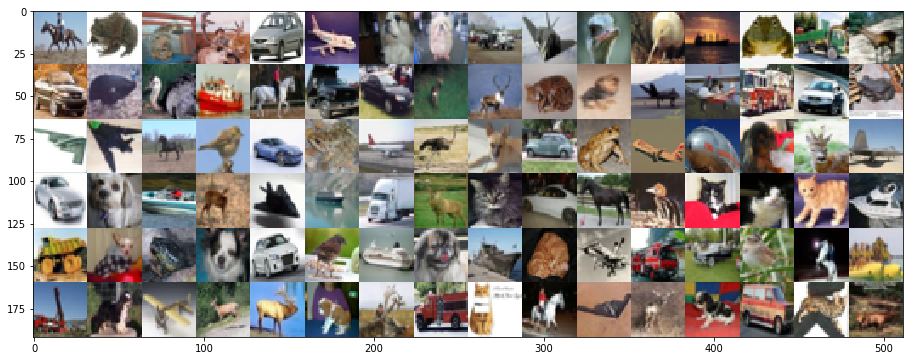

In [4]:
samples = np.concatenate([np.concatenate([x_train[i] for i in [int(random.random() * len(x_train)) for i in range(16)]], axis=1) for i in range(6)], axis=0)
plt.figure(figsize=(16,6))
plt.imshow(samples, cmap='gray')

### Préparation

In [0]:
from keras.utils import to_categorical

train_images = x_train.astype('float32') / 255
test_images = x_test.astype('float32') / 255

train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)



Il est important de noter qu'un convnet prend en entrée des tenors de forme (image_height, image_width, image_channels) (sans inclure la dimension batch). Dans notre cas, nous allons configurer notre convnet pour traiter des entrées de taille (32, 32, 3), qui est le format des images CIFAR10. Nous faisons cela en passant l'argument input_shape = (28, 28, 1) à notre première couche.

## Étape 3: Définition de l'architecture du modèle

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(train_images.shape[1], train_images.shape[2], train_images.shape[3])))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
model.add(layers.Flatten())
#model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                10250     
Total para

In [0]:
#plot_model(model, to_file='plot_model_ConvNet.png', show_shapes=True, show_layer_names=True)
#files.download('plot_model_ConvNet.png')

In [0]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Étape 4: Entrainement du modèle

### Validation

Creation d'un dataset de validation

In [0]:
x_val = train_images[:10000]
partial_x_train = train_images[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

On peut maintenant entrainer le model

In [11]:
history = model.fit(partial_x_train, partial_y_train, 
                    epochs=20, 
                    batch_size=128,
                   validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 8s 193us/step - loss: 1.8349 - acc: 0.3398 - val_loss: 1.5712 - val_acc: 0.4183
Epoch 2/20
40000/40000 [==============================] - 3s 68us/step - loss: 1.4704 - acc: 0.4764 - val_loss: 1.3570 - val_acc: 0.5098
Epoch 3/20
40000/40000 [==============================] - 3s 68us/step - loss: 1.3196 - acc: 0.5346 - val_loss: 1.3954 - val_acc: 0.5075
Epoch 4/20
40000/40000 [==============================] - 3s 69us/step - loss: 1.2097 - acc: 0.5765 - val_loss: 1.1595 - val_acc: 0.5945
Epoch 5/20
40000/40000 [==============================] - 2s 60us/step - loss: 1.1251 - acc: 0.6095 - val_loss: 1.1184 - val_acc: 0.6128
Epoch 6/20
40000/40000 [==============================] - 2s 60us/step - loss: 1.0547 - acc: 0.6366 - val_loss: 1.1291 - val_acc: 0.5994
Epoch 7/20
40000/40000 [==============================] - 2s 60us/step - loss: 

## Étape 5: Évaluation du modèle

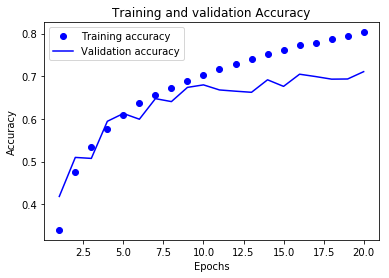

In [12]:
history_dict = history.history
history_dict.keys()

acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1,len(acc)+1)
plot_history(epochs, acc, val_acc, 'Training accuracy', 'Validation accuracy', 'Epochs', 'Accuracy','Training and validation Accuracy')

On a un modèle qui faire du surapprentissage. Nous allons revenir sur comment faire pour résoudre ce problème.
Pour l'instant nous allons regarder les perforances du modele avec les données de test

In [13]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print('test accuracy:', test_accuracy)

10000/10000 [==============================] - 1s 69us/step
test accuracy: 0.7081


L'architecture ConvNet (de base) nous a permis d'avoir un taux de bonne clssification de 70%. C'est une excellente amélioration par rapport au modèle CIFAR10_BASELINE réalisé durant le lab précédent (a un taux de bonne classification de 48%)

##À vous

1- Essayer de coder chaque étape du notebook

2- Dans la 3e étape: modifier le premier paramètre dans la couche Conv2D. Par exemple remplacer ici: **model.add(layers.Conv2D(64, (3, 3), activation='relu')))** le nombre d'unité 64 par 128.